<a href="https://colab.research.google.com/github/julianisazam/SO-Lab3-20252/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Seccion 1: Analisis de pi**

In [1]:
import pandas as pd

Ts = 5.705586
N = [1, 2, 3, 4, 5, 6]
Tp = [5.671214, 2.876024, 2.001713, 1.604509, 1.404859, 1.204301]

speedup = [Ts / t for t in Tp]
efficiency = [s / n for s, n in zip(speedup, N)]

df = pd.DataFrame({
    "N (hilos)": N,
    "T_p (s)": Tp,
    "Speedup (T_s / T_p)": speedup,
    "Eficiencia (Speedup / N)": efficiency
})

df = df.round(6)

display(df)


,N (hilos),T_p (s),Speedup (T_s / T_p),Eficiencia (Speedup / N)
0,1,5.671214,1.006061,1.006061
1,2,2.876024,1.983845,0.991923
2,3,2.001713,2.850352,0.950117
3,4,1.604509,3.555970,0.888993
4,5,1.404859,4.061323,0.812265
5,6,1.204301,4.737674,0.789612


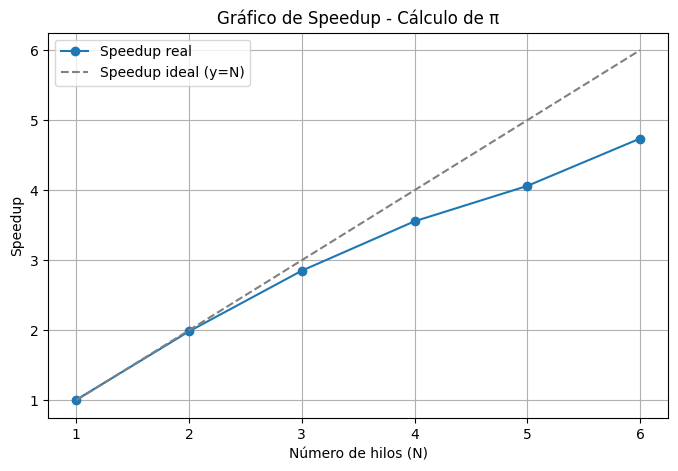

In [2]:
import matplotlib.pyplot as plt

N = [1, 2, 3, 4, 5, 6]
Tp = [5.671214, 2.876024, 2.001713, 1.604509, 1.404859, 1.204301]
Ts = 5.705586

speedup = [Ts / t for t in Tp]

plt.figure(figsize=(8,5))
plt.plot(N, speedup, marker='o', label='Speedup real')
plt.plot(N, N, linestyle='--', color='gray', label='Speedup ideal (y=N)')
plt.title('Gráfico de Speedup - Cálculo de π')
plt.xlabel('Número de hilos (N)')
plt.ylabel('Speedup')
plt.legend()
plt.grid(True)
plt.show()


#**Seccion 2: Analisis de Fibonacci**

###**Salida del programa para fibonacci 15**

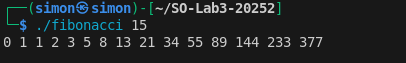

###**Mecanismo para transferir datos del hilo principal al trabajador**
El hilo principal reserva memoria dinámica para el arreglo compartido con malloc, creando un bloque contiguo capaz de almacenar N elementos (tipo unsigned long long).
Se crea una estructura auxiliar FibArg que contiene:
unsigned long long *arr — puntero al arreglo dinámico donde se almacenarán los resultados.
int n — el número de elementos N a generar.
El puntero a esta estructura (FibArg *) se pasa como argumento a pthread_create al iniciar el hilo trabajador. Así el trabajador recibe un único puntero (void *) que contiene tanto el puntero al arreglo como el valor N.
Dentro del hilo trabajador se hace un cast de vuelta a FibArg * y se usa a->arr y a->n para escribir directamente en la memoria reservada por el main. Esto evita copias innecesarias: ambos hilos comparten la misma región de memoria, y el trabajador escribe los resultados en el arreglo provisto por el main.


###**Rol de pthread_join como mecanismo de sincronización**

pthread_join(tid, NULL) es usado por el hilo principal para esperar a que el hilo trabajador termine su ejecución.
Este join garantiza que cuando el hilo principal continúa después de la llamada, el hilo trabajador ya completó la escritura de los N elementos en el arreglo compartido.
Sin pthread_join, el main podría intentar leer e imprimir el arreglo antes de que el trabajador haya terminado de rellenarlo, lo que produciría valores incompletos o condiciones de carrera.
Además, pthread_join sincroniza la finalización del hilo y actúa como punto de ordenamiento: cualquier escritura que el trabajador realizó en memoria antes de terminar será visible para el hilo principal después del join (propiedad de sincronización entre hilos).
En este diseño no necesitamos mutexes ni variables de condición porque la comunicación es unidireccional (main -> worker: memoria y N; worker -> main: resultados escritos) y la sincronización necesaria se logra con pthread_join.
